In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random


In [6]:
hid_image = input("Enter the name of image to be hidden : ")
holder = input("Enter the name of image which holds the hidden image ")

Enter the name of image to be hidden : iiitdm128.JPG
Enter the name of image which holds the hidden image holder.png


ENCODING 

In [7]:
c = cv2.imread(holder)#holder   - image holding the hidden image
im = cv2.imread(hid_image)#hid-image  -  image to be hidden

m1 = c.shape[0] #768
n1 = c.shape[1] #1366
m2 = im.shape[0] #295
n2 = im.shape[1] #299

if(m1*n1 < 2*m2*n2 + 5):
    print("ERROR : Size of the host image is NOT sufficient to hold the image to be hidden")

#flatten the two images (holder and hid-image)    
fl = c.flatten()
iml = im.flatten()

#embed size of hid-image in holder
fl[0] = int(m2/256)
fl[1] = m2 % 256
fl[2] = int(n2/256)
fl[3] = n2 % 256

#embed hid-image in the last 4 bits of the pixels of the holder
for i in range(m2*n2*3):
    fl[2*i+4] = int(fl[2*i+4]/16)*16 + int(iml[i]/16)
    fl[2*i+4+1] = int(fl[2*i+4+1]/16)*16 + int(iml[i]%16)

#final image = holder + hid-image
fw = fl.reshape(m1,n1,3)

#save as 'png' so that there is no data loss
cv2.imwrite("encoded.png",fw)

True

DECODING

In [9]:
enc = input("Enter name of image file to be decoded : ")

Enter name of image file to be decoded : encoded.png


True

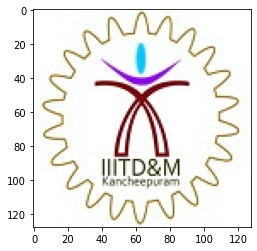

In [10]:
encoded = cv2.imread(enc)

cof = encoded.flatten()

#get size of hid-image from the encoded image
m_2 = cof[0]*256 + cof[1]
n_2 = cof[2]*256 + cof[3]

#extract the hid-image
extract = []
for i in range(4,m_2*n_2*3*2+4):
    if(i%2==0):
        extract.append((cof[i]%16)*16 + (cof[i+1]%16))
        
extract = np.array(extract)
extract = extract.reshape(m_2,n_2,3)
plt.imshow(extract)
cv2.imwrite("decoded.png",extract)